# `API`
- Application programming interface

In [2]:
from dotenv import load_dotenv
import os
import requests
import pandas as pd

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []
for symbol in symbols:
    function = "TIME_SERIES_INTRADAY"    
    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=5min&apikey={api_key}'
    data = requests.get(url).json()
    stock_list.append(data)

In [3]:
len(stock_list)

4

In [4]:
stock_list[0].keys()

dict_keys(['Meta Data', 'Time Series (5min)'])

In [5]:
# datetime1: dict,
# datetime2: dict
pd.DataFrame(stock_list[0]["Time Series (5min)"]).T.head() # .T is TRANSPOSE. Shifts columns to rows.

,1. open,2. high,3. low,4. close,5. volume
2022-11-07 20:00:00,139.5000,139.5600,139.4700,139.5400,13912
2022-11-07 19:55:00,139.4500,139.5300,139.4201,139.5300,2975
2022-11-07 19:50:00,139.4500,139.5000,139.4500,139.5000,7016
2022-11-07 19:45:00,139.3300,139.4900,139.3100,139.4300,6821
2022-11-07 19:40:00,139.3900,139.3900,139.3000,139.3300,5415


In [9]:
load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []
for symbol in symbols:
    function = "TIME_SERIES_INTRADAY"    
    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=60min&apikey={api_key}'
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (60min)"]).T # T transpose
    series = df["4. close"].rename(symbol).astype(float)
    stock_list.append(series)

In [ ]:
df.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2022-11-07 20:00:00 to 2022-10-28 17:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [10]:
# concatenated a list of series into a dataframe
stocks = pd.concat(stock_list, axis = "columns")
stocks

,AAPL,NVDA,TSLA,IBM
2022-11-07 20:00:00,139.5400,143.90,197.30,NaN
2022-11-07 19:00:00,139.0400,143.06,196.73,138.70
2022-11-07 18:00:00,138.8601,142.93,197.18,NaN
2022-11-07 17:00:00,138.9200,143.00,197.58,138.34
2022-11-07 16:00:00,138.9600,143.03,197.06,138.34
...,...,...,...,...
2022-10-27 12:00:00,NaN,NaN,NaN,135.22
2022-10-27 11:00:00,NaN,NaN,NaN,135.63
2022-10-27 10:00:00,NaN,NaN,NaN,135.40
2022-10-27 09:00:00,NaN,NaN,NaN,135.15


In [11]:
import plotly.express as px

px.line(
    stocks,
    x=stocks.index,
    y=symbols,
    labels={"variable": "Stock", "value": "Value in (USD) $", "index": "Date"},
    title="Stocks in one week",
)


# Working with time series

In [12]:
#print(f"{stocks.index.dtype = }") 

# convert dtype object to datetime
stocks.index = pd.to_datetime(stocks.index)
print(stocks.index.dtype)
stocks.head()

datetime64[ns]


,AAPL,NVDA,TSLA,IBM
2022-11-07 20:00:00,139.5400,143.90,197.30,NaN
2022-11-07 19:00:00,139.0400,143.06,196.73,138.70
2022-11-07 18:00:00,138.8601,142.93,197.18,NaN
2022-11-07 17:00:00,138.9200,143.00,197.58,138.34
2022-11-07 16:00:00,138.9600,143.03,197.06,138.34


In [13]:
stocks.loc["2022"].head()

,AAPL,NVDA,TSLA,IBM
2022-11-07 20:00:00,139.5400,143.90,197.30,NaN
2022-11-07 19:00:00,139.0400,143.06,196.73,138.70
2022-11-07 18:00:00,138.8601,142.93,197.18,NaN
2022-11-07 17:00:00,138.9200,143.00,197.58,138.34
2022-11-07 16:00:00,138.9600,143.03,197.06,138.34


In [14]:
stocks.loc["2022-10-28"] # extracts all rows with date 2022-10-28

,AAPL,NVDA,TSLA,IBM
2022-10-28 20:00:00,155.5714,138.79,228.3500,NaN
2022-10-28 19:00:00,155.5415,138.88,228.3500,138.52
2022-10-28 18:00:00,155.6812,138.73,228.4457,NaN
2022-10-28 17:00:00,156.0406,138.86,228.7000,138.53
2022-10-28 16:00:00,NaN,NaN,NaN,138.53
2022-10-28 15:00:00,NaN,NaN,NaN,138.73
2022-10-28 14:00:00,NaN,NaN,NaN,138.51
2022-10-28 13:00:00,NaN,NaN,NaN,138.33
2022-10-28 12:00:00,NaN,NaN,NaN,138.04
2022-10-28 11:00:00,NaN,NaN,NaN,138.37


In [15]:
stocks.sort_index().loc["2022-10-28":"2022-10-31"].head()
# can extract specific date and time from stocks.

,AAPL,NVDA,TSLA,IBM
2022-10-28 08:00:00,NaN,NaN,NaN,134.20
2022-10-28 09:00:00,NaN,NaN,NaN,134.75
2022-10-28 10:00:00,NaN,NaN,NaN,138.12
2022-10-28 11:00:00,NaN,NaN,NaN,138.37
2022-10-28 12:00:00,NaN,NaN,NaN,138.04


In [16]:
from datetime import datetime, timedelta

now = datetime.now() # now get the current date.
last_week = (now-timedelta(7)).strftime("%Y-%m-%d") # timedelta goes back 7 days.
str(now.date())

print(f"{last_week = }")
print(f"{now = }")

stocks.sort_index().loc[last_week:now] # goes from 7 days in the past through now.

last_week = '2022-11-01'
now = datetime.datetime(2022, 11, 8, 9, 18, 42, 504451)


,AAPL,NVDA,TSLA,IBM
2022-11-01 05:00:00,154.2936,137.38,231.70,138.89
2022-11-01 06:00:00,154.5431,137.27,231.80,139.14
2022-11-01 07:00:00,154.7428,137.54,232.55,NaN
2022-11-01 08:00:00,154.6829,137.54,232.15,NaN
2022-11-01 09:00:00,155.3119,138.15,233.18,139.15
...,...,...,...,...
2022-11-07 16:00:00,138.9600,143.03,197.06,138.34
2022-11-07 17:00:00,138.9200,143.00,197.58,138.34
2022-11-07 18:00:00,138.8601,142.93,197.18,NaN
2022-11-07 19:00:00,139.0400,143.06,196.73,138.70


## `Subplots in 2x2 figure`


axes.shape = (2, 2)
axes.dtype = dtype('O')
axes.flatten() = array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)
axes.flatten().shape = (4,)


Text(0.5, 1.05, 'A few teck stocks')

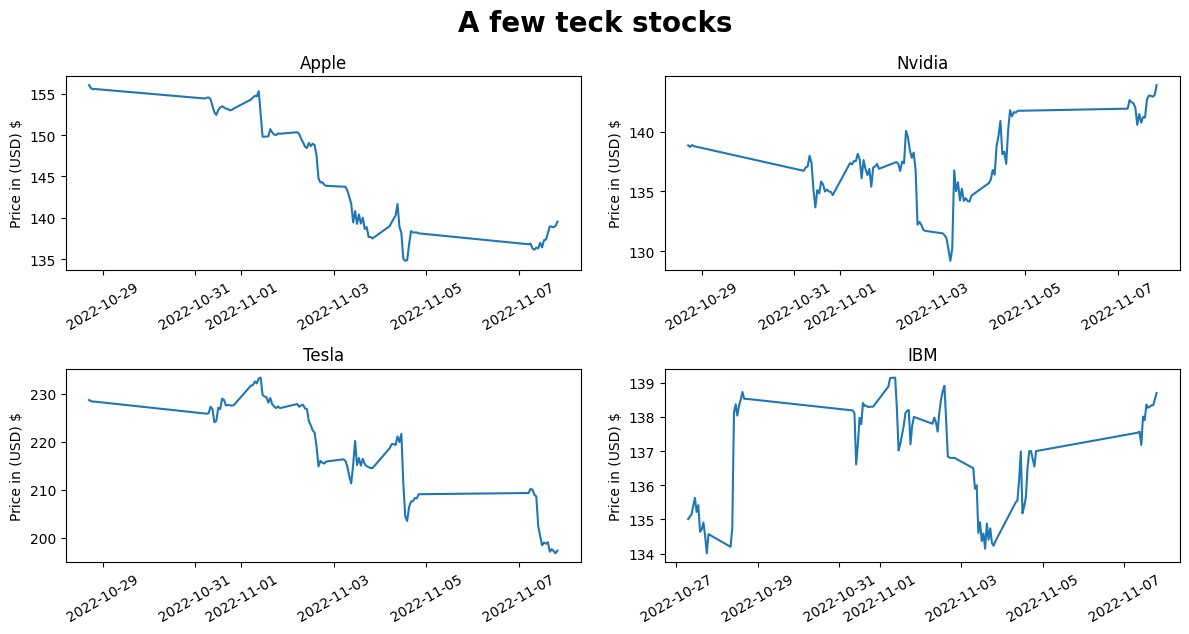

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, figsize = (12,6))

print(f"{axes.shape = }") # A few info prints for axes to get a better understanding. its a  2d array.
print(f"{axes.dtype = }")
print(f"{axes.flatten() = }")
print(f"{axes.flatten().shape = }")

stock_names = {"AAPL": "Apple", "NVDA": "Nvidia", "TSLA": "Tesla", "IBM": "IBM"}

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data = stocks, x = stocks.index, y = symbol, ax = ax,)
    ax.set(title = f"{stock_names[symbol]}", ylabel = "Price in (USD) $")
    ax.tick_params(axis = "x", rotation = 30)

fig.tight_layout()
fig.suptitle("A few teck stocks", y = 1.05, fontweight = "bold", fontsize = 20)

#Innefficient ways to 
# for i in range(2):
#     for j in range(2):
#         axes[i][j].plot()

# axes[0][0].plot()
# axes[0][1].plot()
# axes[1][0].plot()
# axes[1][1].plot()